In [ ]:
!mkdir /root/.config/kaggle
!mv kaggle.json /root/.config/kaggle

mv: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d pythonafroz/solar-panel-images

Dataset URL: https://www.kaggle.com/datasets/pythonafroz/solar-panel-images
License(s): unknown
 97% 297M/305M [00:02<00:00, 104MB/s]
100% 305M/305M [00:02<00:00, 123MB/s]


In [ ]:
!unzip solar-panel-images.zip

Archive:  solar-panel-images.zip
  inflating: Faulty_solar_panel/Bird-drop/Bird (1).jpeg  
  inflating: Faulty_solar_panel/Bird-drop/Bird (10).jpg  
  inflating: Faulty_solar_panel/Bird-drop/Bird (100).jpg  
  inflating: Faulty_solar_panel/Bird-drop/Bird (101).jpg  
  inflating: Faulty_solar_panel/Bird-drop/Bird (102).jpg  
  inflating: Faulty_solar_panel/Bird-drop/Bird (103).jpg  
  inflating: Faulty_solar_panel/Bird-drop/Bird (104).jpg  
  inflating: Faulty_solar_panel/Bird-drop/Bird (105).jpg  
  inflating: Faulty_solar_panel/Bird-drop/Bird (106).jpg  
  inflating: Faulty_solar_panel/Bird-drop/Bird (107).jpg  
  inflating: Faulty_solar_panel/Bird-drop/Bird (108).jpg  
  inflating: Faulty_solar_panel/Bird-drop/Bird (109).jpg  
  inflating: Faulty_solar_panel/Bird-drop/Bird (11).jpg  
  inflating: Faulty_solar_panel/Bird-drop/Bird (110).jpg  
  inflating: Faulty_solar_panel/Bird-drop/Bird (111).jpg  
  inflating: Faulty_solar_panel/Bird-drop/Bird (112).jpg  
  inflating: Faulty_solar_

In [ ]:
import os
import shutil

In [ ]:
os.mkdir("Faulty_solar_panel/Dirty")
os.mkdir("Faulty_solar_panel/Damaged")

In [ ]:
def mv_files(path,destination):
  for file in os.listdir(path):
    shutil.move(f"{path}/{file}",f"{destination}/{file}")
mv_files("Faulty_solar_panel/Dusty","Faulty_solar_panel/Dirty")
mv_files("Faulty_solar_panel/Snow-Covered","Faulty_solar_panel/Dirty")
mv_files("Faulty_solar_panel/Bird-drop","Faulty_solar_panel/Dirty")

mv_files("Faulty_solar_panel/Electrical-damage","Faulty_solar_panel/Damaged")
mv_files("Faulty_solar_panel/Physical-Damage","Faulty_solar_panel/Dirty")
mv_files("Faulty_solar_panel/Dirty/New","Faulty_solar_panel/Dirty")

In [ ]:
!rmdir Faulty_solar_panel/Dirty/New Faulty_solar_panel/Bird-drop Faulty_solar_panel/Dusty Faulty_solar_panel/Snow-Covered Faulty_solar_panel/Electrical-damage Faulty_solar_panel/Physical-Damage

In [ ]:
import tensorflow as tf

In [ ]:
train = tf.keras.utils.image_dataset_from_directory("Faulty_solar_panel",validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(128, 128),
  batch_size=32,
  label_mode = "categorical")

val = tf.keras.utils.image_dataset_from_directory("Faulty_solar_panel",validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(128, 128),
  batch_size=32,
  label_mode = "categorical")

Found 885 files belonging to 3 classes.
Using 708 files for training.
Found 885 files belonging to 3 classes.
Using 177 files for validation.


'2.17.0'

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(128,128,3),
                                               include_top=False,
                                               weights='imagenet')

base_model.trainable = False


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
])

In [ ]:
prediction_layer = tf.keras.layers.Dense(3, activation='sigmoid')
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

In [ ]:
tf.random.set_seed(42)

In [ ]:
inputs = tf.keras.Input(shape=(128, 128, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
check_point = tf.keras.callbacks.ModelCheckpoint("./model.keras",save_best_only=True,monitor="val_accuracy",mode="max",initial_value_threshold=0.6)

In [ ]:
epochs=100
history = model.fit(
  train,
  validation_data=val,
  epochs=epochs,callbacks=[check_point]
)

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 16s 448ms/step - accuracy: 0.9177 - loss: 0.2270 - val_accuracy: 0.8023 - val_loss: 0.5959
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 20s 427ms/step - accuracy: 0.9442 - loss: 0.1573 - val_accuracy: 0.7853 - val_loss: 0.5835
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 431ms/step - accuracy: 0.9318 - loss: 0.1624 - val_accuracy: 0.8192 - val_loss: 0.4788
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 9s 416ms/step - accuracy: 0.9274 - loss: 0.1517 - val_accuracy: 0.7966 - val_loss: 0.5526
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 353ms/step - accuracy: 0.9490 - loss: 0.1438 - val_accuracy: 0.8023 - val_loss: 0.5444
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 11s 418ms/step - accuracy: 0.9723 - loss: 0.1299 - val_accuracy: 0.8192 - val_loss: 0.4750
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 432ms/step - accuracy: 0.9204 - loss: 0.1855 - val_accuracy: 0.8305 - val_loss: 0.4983
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 9s 408ms/step - accuracy: 0.9311 - loss: 0.1741 - val

In [ ]:
model = tf.keras.models.load_model("model.keras")

In [ ]:
for img,label in train.take(1):
  pred = model.predict(img)
  break

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


In [ ]:
import keras
keras.__version__

'3.4.1'

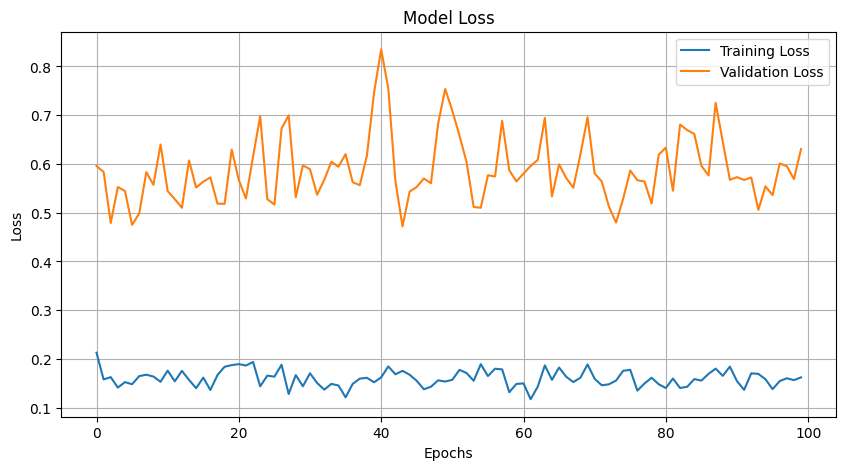

In [ ]:
import matplotlib.pyplot as plt

# Plot loss
plt.figure(figsize=(10, 5))
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


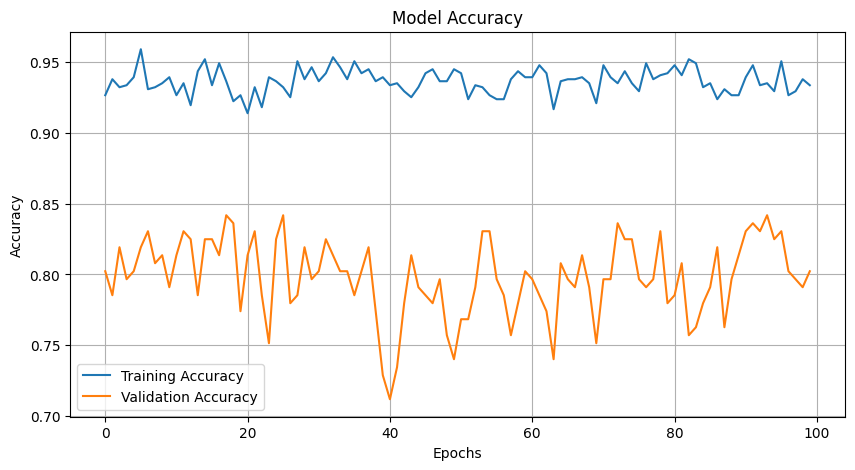

In [ ]:
# Plot accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()